# CNN

In [1]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [4]:
# load and split DATASETS
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [10]:
(train_images,train_labels),(test_images,test_labels)

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [5]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

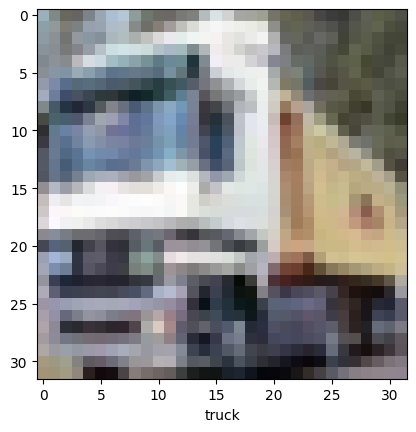

In [7]:
# let's look at a one image. We change to look at other images(img_index=1,2,3,4,5,....)
IMG_INDEX=1
plt.imshow(train_images[IMG_INDEX],cmap=plt.cm.binary) # visualization in cluster maping in binary image show(imshow)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [13]:
model=models.Sequential() # layers specifics input---> hidden ---> output
# 32 -> nurens , 3,3 => kernel same for each (3X3 matrics general)
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2))) # this layers will perform the max pooling operation using 2 x2 matrix
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

# adding flutter layer

In [15]:
model.add(layers.Flatten())
# we need to take these extracted features and add a way to classify them
# this is why we add the layers to our model.

# full connected NEURONS

In [16]:
model.add(layers.Dense(64,activation='relu')) # hidden layer
model.add(layers.Dense(10)) # output layer

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# NOW WE WILL TRAIN AND COMPILE THE MODEL USING THE RECOMMENDED HYPERPARAMETERS FROM Tensorflow.

In [19]:
# adam => optomizer
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [20]:
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.2930 - loss: 2.4822 - val_accuracy: 0.5001 - val_loss: 1.3943
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.5085 - loss: 1.3733 - val_accuracy: 0.5433 - val_loss: 1.2822
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.5782 - loss: 1.1978 - val_accuracy: 0.5643 - val_loss: 1.2117
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.6175 - loss: 1.0963 - val_accuracy: 0.6289 - val_loss: 1.0716
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.6559 - loss: 0.9889 - val_accuracy: 0.6256 - val_loss: 1.1145
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.6792 - loss: 0.9235 - val_accuracy: 0.6588 - val_loss: 0.9965
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.7034 - loss: 0.8548 - val_accuracy: 0.6407 - val_loss: 1.0585
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.7143 -

In [25]:
# EVALUATION THE MODEL
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(f'testaccuracy:{test_acc}')

313/313 - 2s - 8ms/step - accuracy: 0.6716 - loss: 1.0416
testaccuracy:0.6715999841690063


AGENDA 2

In [21]:
# HOW CAN WE IMPROVE THE PERFORMANCE OF THE MODEL -->
# (A.) HYPERPARAMETER TUNING
# (B.) PRE-TRAINED MODELS


In [33]:
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()

In [27]:
(raw_train,raw_validation,raw_test),metadata=tfds.load('cats_vs_dogs',
                                                       split=['train[:80%]','train[80%:90%]','train[90%:]'],
                                                       with_info=True,as_supervised=-True)

In [28]:
get_label_name=metadata.features['label'].int2str

In [29]:
import matplotlib.pyplot as plt

In [30]:
# create a function object that we can use to get labels.
# DISPLAY 2 IMAGES FROM THE DATASETS

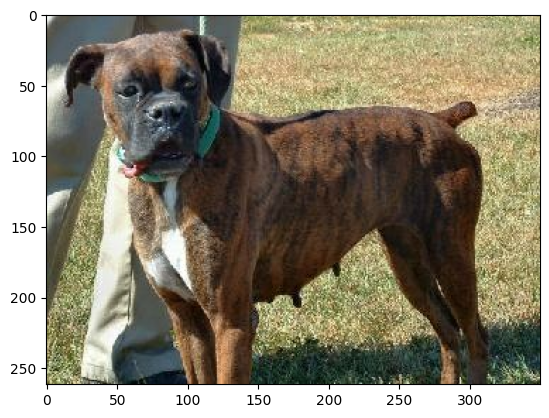

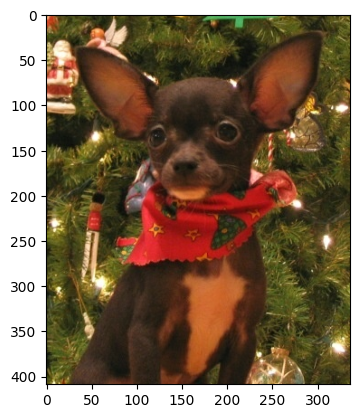

In [32]:
for image,label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title=(get_label_name(label))
  # outout dog in different classification


In [34]:
# NOW we will resize the image shape
IMG_SIZE=160 # ALL IMAGES WILL BE RESIZED TO 160 x 160 PIXELS
def format_example(image,label):
  # return an image that is reshaped to IMG_SIZE
  image=tf.cast(image,tf.float32)
  image=(image/127.5)-1
  image=tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
  return image,label

In [35]:
# now we can apply this function to all our images using map.
train=raw_train.map(format_example)
validation=raw_validation.map(format_example)
test=raw_test.map(format_example)

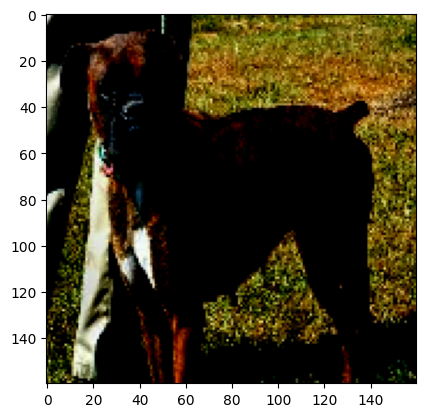

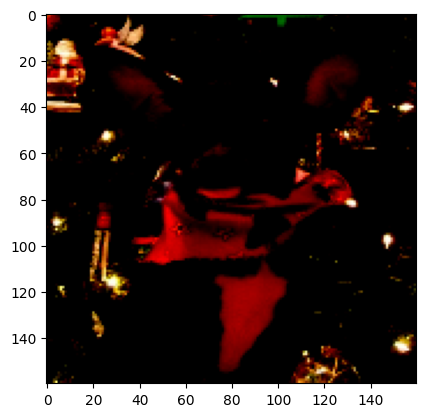

In [36]:
# let's have a look at our image now:
for image,label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title=(get_label_name(label))